# Word2Vec from scratch: 
- Take a large corpus of text
- Every word in a fixed wocabulary is represented by a vector
- Go through each position $t$ in the text which has a center word $c$ and context $o$
- Use the similarity of word vectors for $c$ and $o$ to calculate the probability of $o$ given $c$: $P(\{w_o\}|w_c)$
- Keep adjusting the word vectors to maximise this probability

Likelihood:
$$L(\theta) = \prod_{t=1}^T\prod_{-m\leq j\leq m} P(w_{t+j}|w_t;\theta)$$
where we optimise the parameters of $\theta$. We optimise the loss function:
$$J(\theta) = - \frac{1}{T} \sum_{t=1}^T\sum_{-m\leq j\leq m} \text{log}(P(w_{t+j}|w_t;\theta))$$
How do we calculate the likelihood?
We use two vectors per word:
- $v_w$ when $w$ is the center word
- $u_w$ when $w$ where the word is an outside word

so that for each word in the context we have the likelihood:
$$P(o|c) = \frac{\exp(u_o^T v_c)}{\sum_{w\in V} \exp(u_w^T v_c)}$$
which is a softmax which normalises over all the possible words in the vocabulary.

### Forward Pass:
$$h = W_1 x$$
$$s = W_2 h_1$$
$$y_c = \text{softmax}(s)$$
with the loss given by
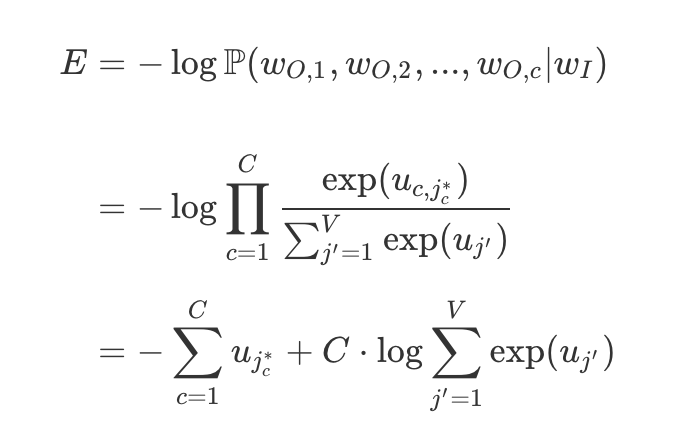


### Backward pass
$$\frac{\partial L}{\partial s_2 } = -2(y - s_2)$$

$$\partial L / \partial f_1 =  \frac{\partial L}{\partial s_2 }\frac{\partial s_2}{\partial f_1 } = -2(y - s_2)\cdot W_2$$

$$\partial L / \partial s_1 =  \frac{\partial L}{\partial f_1 }\frac{\partial f_1}{\partial s_1 } \quad \text{where} \quad \frac{\partial f_1}{\partial s_1 } = f_1(1-f_1)$$

So the weight updates (this comes from the fact that multiplication "switches" the gradients between two inputs - in this case the weights and the inputs):
$$ \frac{\partial L}{\partial W_2 } = f_1\cdot\frac{\partial L}{\partial s_2 }$$
$$ \frac{\partial L}{\partial W_1 } = \frac{\partial L}{\partial s_1 } \cdot x^T$$

In [ ]:
class Word2Vec:
    def __init__():
        pass
    
    def forward():
        
    
    def softmax(self, x):
        """Compute the softmax of vector x in a numerically stable way."""
        shiftx = x - np.max(x)
        exps = np.exp(shiftx)
        return exps/np.sum(exps, axis=0).reshape(1, -1)
    